# Hands-On AgriSatPy

@author: Lukas Valentin Graf (Crop Science, ETH Zurich; Remote Sensing Team, Agroscope)

## Objectives
In this notebook you find some tasks to learn how to use AgriSatPy for remote sensing image analysis and data extraction/conversion.

## Preparation
We will use a Planet-Scope image for this excercise.

To get started make sure that `../data/0220414_101133_47_227b/` (the Planet-Scope scene) is available and that this notebook is attached to a Jupyter instance that has `AgriSatPy` available (we recommend to use the docker container provided).

## Step 1 - Loading the Planet Scene

The code snippet below shows how to load the Planet-Scope scene into a `AgriSatPy` `RasterCollection` object. `RasterCollection` objects can contain 0 to *n* raster bands which `AgriSatPy` models a `Band` instances.

First, the required modules are imported and the file-path to the Planet-Scope scene (surface reflectance) is defined.

In [1]:
# define file-path to scene
from pathlib import Path

fpath_ps_sr = Path('../data/20220414_101133_47_227b/20220414_101133_47_227b_3B_AnalyticMS_SR_8b_clip.tif')
# make sure the file was found, otherwise change the path
fpath_ps_sr.exists()

True

In [2]:
# for plotting -> increase default figure size
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

In [3]:
# load the RasterCollection class from AgriSatPy's core module
from agrisatpy.core.raster import RasterCollection

# we can define optional color-names per spectral band of the SuperDove sensor which serve as band aliases
# and are very useful for fast spectral index calculation. In theory we could use the band names
# provided by Planet only, but the naming proposed below ensures compability with Sentinel-2
color_names = ['coastal_blue', 'blue', 'green_i', 'green', 'yellow', 'red', 'red_edge_1', 'nir_1']

# AgriSatPy can create a RasterCollection instance from a multi-band raster image directly
ps_sr = RasterCollection.from_multi_band_raster(
    fpath_raster=fpath_ps_sr,
    band_aliases=color_names
)
ps_sr

/mnt/ides/Lukas/venvs/geo_notebooks/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


The entire PlanetScope scene is now loaded into a new `RasterCollection` instance: `ps_sr`. It is now possible to use all capabilities of the `RasterCollection` class on this object:

In [4]:
# check band names -> the ones given by Planet
ps_sr.band_names

['coastal_blue', 'blue', 'green_i', 'green', 'yellow', 'red', 'rededge', 'nir']

In [5]:
# check color names -> the ones given by AgriSatPy
ps_sr.band_aliases

['coastal_blue',
 'blue',
 'green_i',
 'green',
 'yellow',
 'red',
 'red_edge_1',
 'nir_1']

## Step 2 - Visualization
`AgriSatPy` allows for fast visualization of the data:

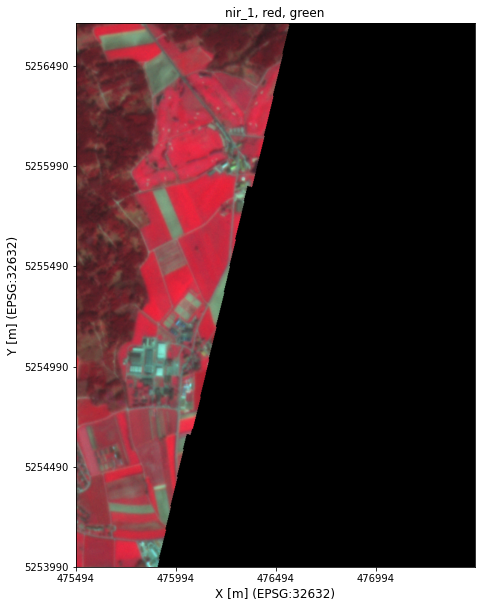

In [6]:
# false color-infrared -> note that we access the bands directly using their names or aliases
f_fcir = ps_sr.plot_multiple_bands(band_selection=['nir_1', 'red', 'green'])

## Step 3 - Calculate the NDVI
In addition, spectral indices can be computed using the color names (i.e., aliases). The spectral index is added to the `RasterCollection` instance `ps_sr` if `inplace=True`:

In [7]:
# calculate the NDVI
ps_sr.calc_si('NDVI', inplace=True)

/mnt/ides/Lukas/venvs/geo_notebooks/lib/python3.9/site-packages/agrisatpy/core/spectral_indices.py:88: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (nir - red) / (nir + red)


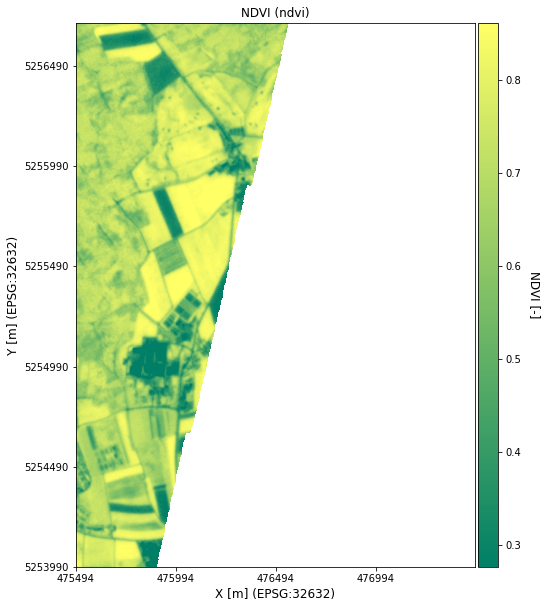

In [8]:
# and plot it using custom color map and legend descriptions
f_ndvi = ps_sr.plot_band(
    'NDVI',
    colormap='summer',
    colorbar_label='NDVI [-]'
)

## Next Steps - Your Part

Here are some tasks to accomplish to get a better feeeling for `AgriSatPy` and the data.

You might find it useful to take a look at the other two notebooks provided in this tutorial:

* [Sentinel-2 scene handling in AgriSatPy](sentinel2_data_handling.ipynb)
* [Sentinel-2 field parcel extraction using AgriSatPy](sentinel2_field_parcel_extraction.ipynb)

Furthermore, have a look at the [docs](../docs/_build/html/index.html) to assess the class and function interfaces and argument specifications.

### Task 1 - Extract Data for a Single Field Parcel only

Repeat step 1 from above but this time only load data for parcel 73129. The file-path to the ESRI shapefile defining the parcel geometry is provided below:

In detail:

1) load the Planet data for the field parcel, only
2) calculate the NDVI - what is the mean NDVI value of the parcel, what is the standard deviation?
3) map the NDVI (hint: specify vmin and vmax based on your insights into the NDVI statistics to get a meaningful visualization)
4) calculate the EVI (enhanced vegetation index). Does it work? If not can you explain why (see also the [formula](https://en.wikipedia.org/wiki/Enhanced_vegetation_index))?
5) if you figured out what the problem in 4) was fix it :)
6) (opt.) there seems to be a tree or similar in the upper part of the parcel - can you mask it using some kind of (spectral index) threshold?

In [13]:
# here's the path to the polygon of the parcel
fpath_parcel = fpath_ps_sr.parent.parent.joinpath('sample_polygons/ZH_Polygon_73129_ESCH_EPSG32632.shp')

# your code goes here

### Task 2 - Extract Pixel Values

This time, we only want to read single pixel values instead of an entire image. We use pre-defined point-locations from a Shapefile to extract pixel values of these points.

In detail:

1. Have a look at the [docs](../docs/_build/html/index.html) and find the class method to use for this task. Implement it in the code block below
2. What is the data type of the extracted pixel values? How many pixels did you get - how many of them are no-data

In [20]:
# this point shapefile defines the locations where we want to sample pixel values
fpath_pixels = fpath_ps_sr.parent.parent.joinpath('sample_pixels/ZH_Points_2019_EPSG32632_random.shp')

# your code goes here